In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")


In [61]:
data = "C:/Users/yasht/OneDrive/Desktop/Stratascratch/Treadmill Buyer Profile/datasets/aerofit_treadmill_data.csv"

In [62]:
df = pd.read_csv(data)

In [63]:
df.shape


(180, 9)

In [64]:
df.columns


Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [65]:
df.dtypes

# A

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [66]:
df['Product'] = df['Product'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['MaritalStatus'] = df['MaritalStatus'].astype('category')



In [67]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


In [68]:
df.skew()


Age          0.982161
Education    0.622294
Usage        0.739494
Fitness      0.454800
Income       1.291785
Miles        1.724497
dtype: float64

In [69]:
df.describe(include = 'all')



,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [70]:
df.isna().sum()


Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [71]:
df.duplicated(subset=None,keep='first').sum() # No duplicate values in the dataset


0

In [72]:
df['Product'].value_counts()


KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [73]:
df['Gender'].value_counts()


Male      104
Female     76
Name: Gender, dtype: int64

In [74]:
df['MaritalStatus'].value_counts()


Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [75]:
df.nunique()


Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

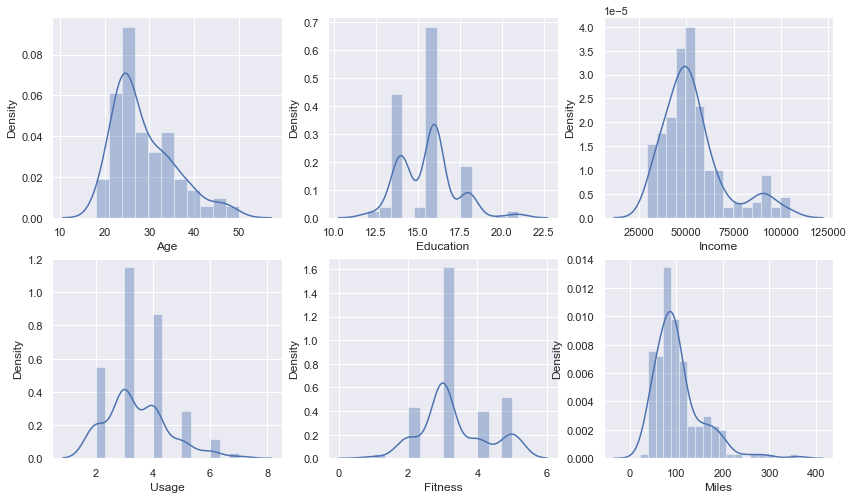

In [76]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(14, 7))
fig.subplots_adjust(top=1)

sns.distplot(df['Age'], kde=True, ax=axis[0,0])
sns.distplot(df['Education'], kde=True, ax=axis[0,1])
sns.distplot(df['Usage'], kde=True, ax=axis[1,0])
sns.distplot(df['Fitness'], kde=True, ax=axis[1,1])
sns.distplot(df['Income'], kde=True, ax=axis[0,2])
sns.distplot(df['Miles'], kde=True, ax=axis[1,2])
plt.show()

# A

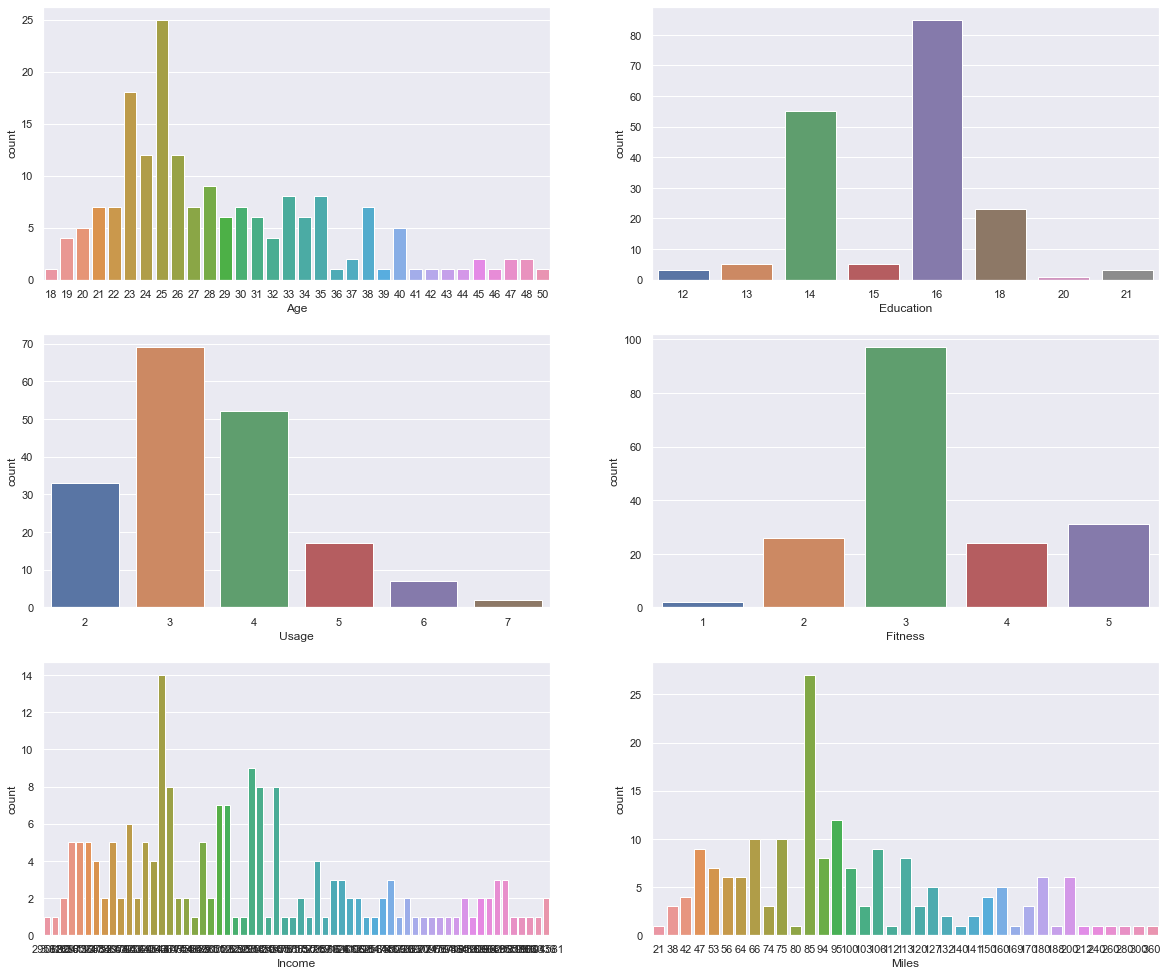

In [77]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(20, 12))
fig.subplots_adjust(top=1.2)

sns.countplot(data=df, x="Age", ax=axis[0,0])
sns.countplot(data=df, x="Education", ax=axis[0,1])
sns.countplot(data=df, x="Usage", ax=axis[1,0])
sns.countplot(data=df, x="Fitness", ax=axis[1,1])
sns.countplot(data=df, x="Income", ax=axis[2,0])
sns.countplot(data=df, x="Miles", ax=axis[2,1])
plt.show()

# A

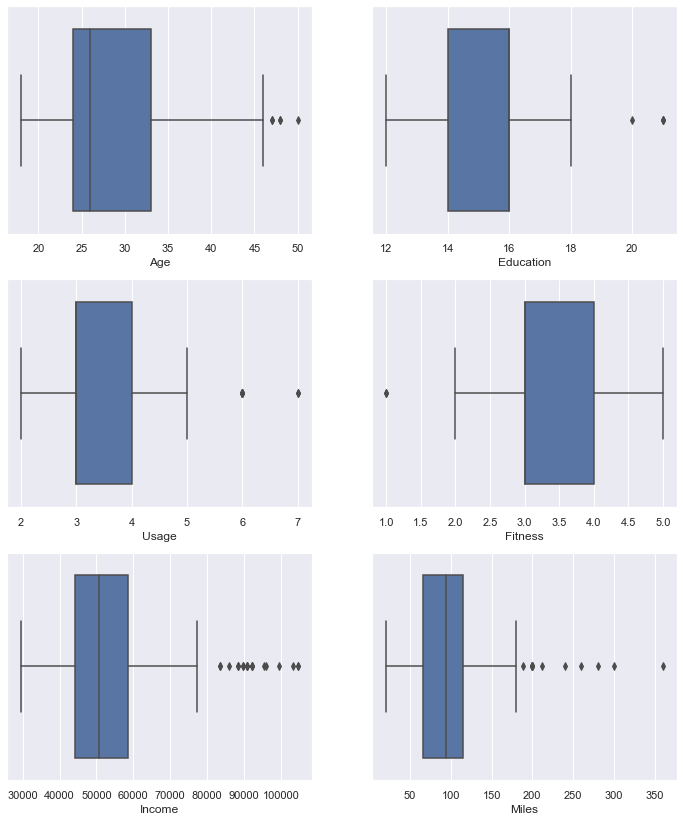

In [78]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=df, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=df, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=df, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=df, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=df, x="Miles", orient='h', ax=axis[2,1])
plt.show()



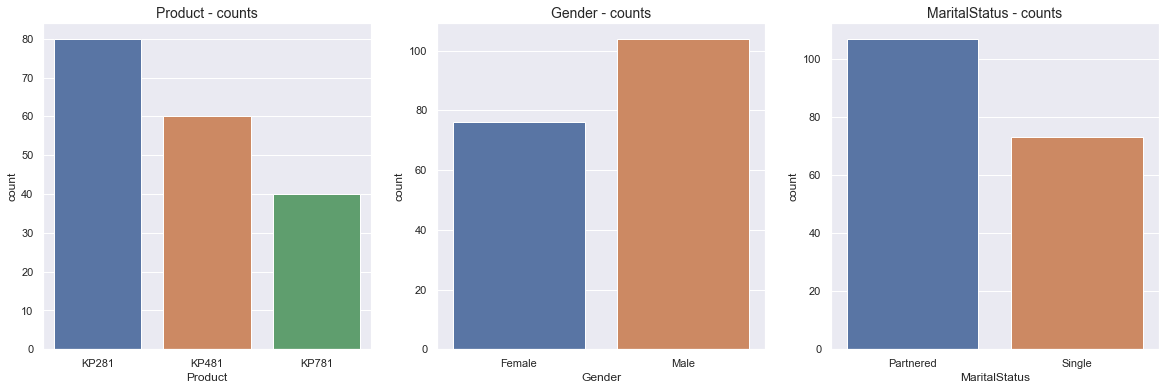

In [79]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
sns.countplot(data=df, x='Product', ax=axs[0])
sns.countplot(data=df, x='Gender', ax=axs[1])
sns.countplot(data=df, x='MaritalStatus', ax=axs[2])

axs[0].set_title("Product - counts", pad=5, fontsize=14)
axs[1].set_title("Gender - counts", pad=5, fontsize=14)
axs[2].set_title("MaritalStatus - counts", pad=5, fontsize=14)
plt.show()


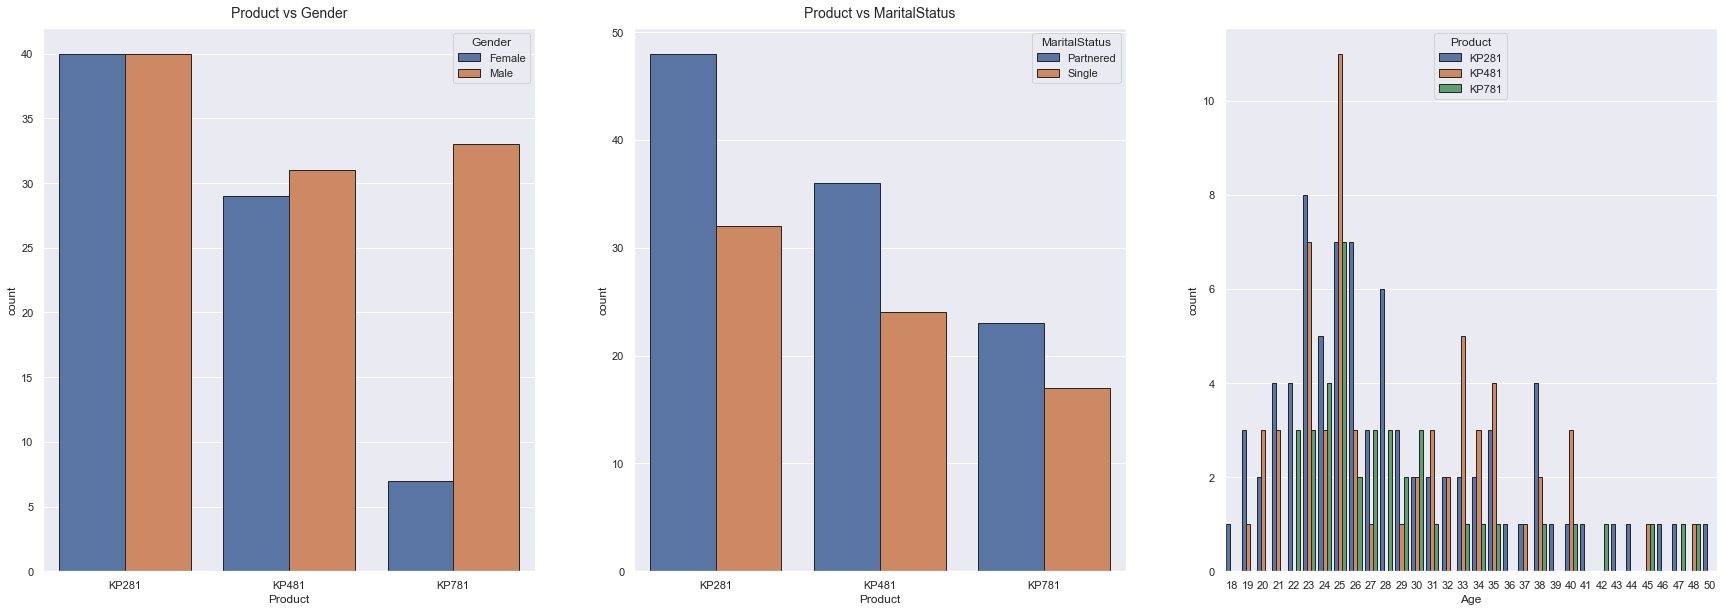

In [80]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
sns.countplot(data=df, x='Product', hue='Gender', edgecolor="0.15", ax=axs[0])
sns.countplot(data=df, x='Product', hue='MaritalStatus', edgecolor="0.15", ax=axs[1])
sns.countplot(data=df, x='Age', hue='Product', edgecolor="0.15", ax=axs[2])
axs[0].set_title("Product vs Gender", pad=10, fontsize=14)
axs[1].set_title("Product vs MaritalStatus", pad=10, fontsize=14)
plt.show()

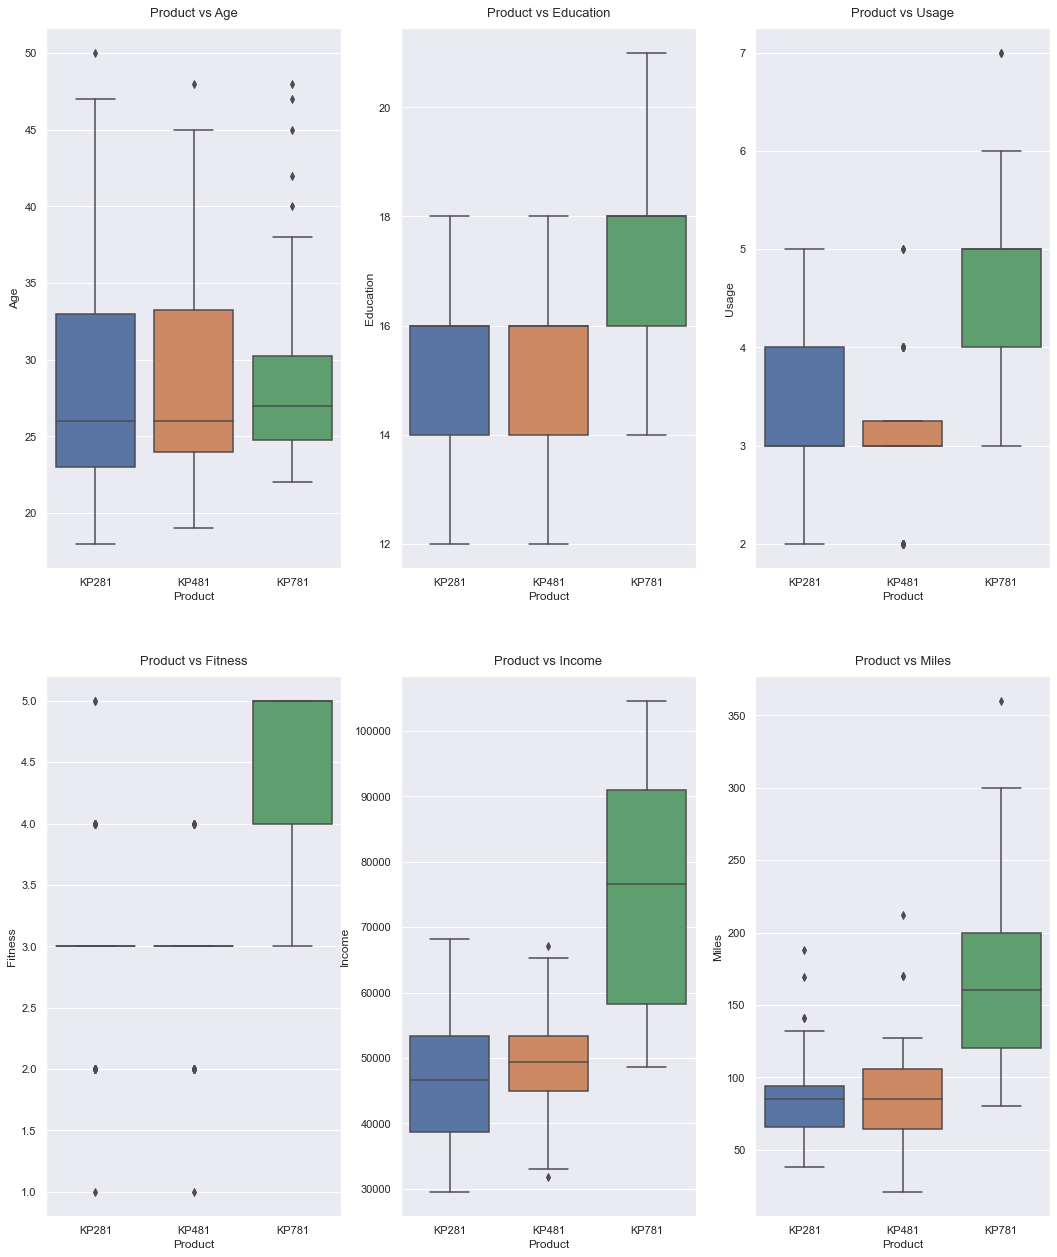

In [81]:
attributes = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set(color_codes = True)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.subplots_adjust(top=1.5)
count = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(data=df, x='Product', y=attributes[count], ax=axs[i,j])
        axs[i,j].set_title(f"Product vs {attributes[count]}", pad=12, fontsize=13)
        count += 1

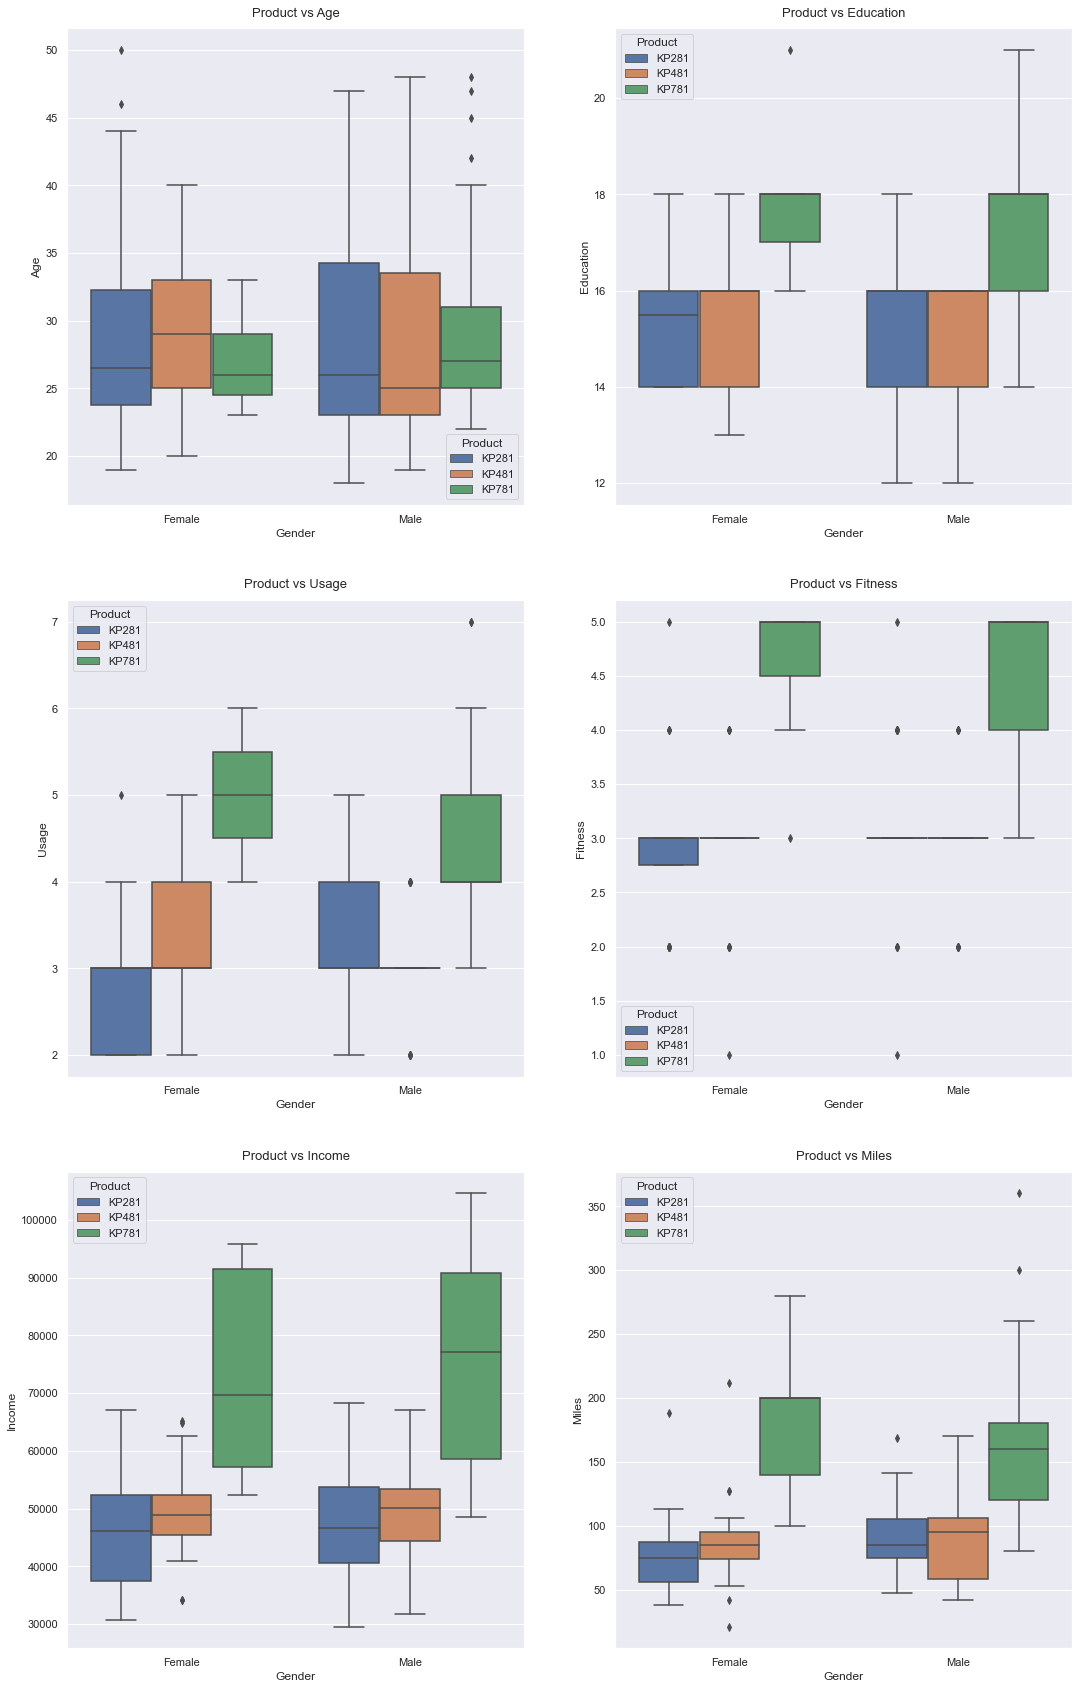

In [82]:
attributes = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set(color_codes = True)
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
fig.subplots_adjust(top=2)
count = 0
for i in range(3):
    for j in range(2):
        sns.boxplot(data=df, x='Gender', y=attributes[count], hue='Product', ax=axs[i,j])
        axs[i,j].set_title(f"Product vs {attributes[count]}", pad=12, fontsize=13)
        count += 1


In [83]:
df.cov()


,Age,Education,Usage,Fitness,Income,Miles
Age,48.212166,3.149410,0.113470,0.406828,5.884446e+04,13.186530
Education,3.149410,2.614867,0.693172,0.636623,1.670472e+04,25.770795
Usage,0.113470,0.693172,1.176785,0.695469,9.303043e+03,42.709808
Fitness,0.406828,0.636623,0.695469,0.919429,8.467925e+03,39.073246
Income,58844.463439,16704.717815,9303.042582,8467.925388,2.724706e+08,465265.361887
Miles,13.186530,25.770795,42.709808,39.073246,4.652654e+05,2689.833489


In [84]:
df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


In [85]:
correlation_matrix = df.corr()

mask = correlation_matrix > 0.6

values_greater_than_0_6 = correlation_matrix[mask]

print(values_greater_than_0_6)



           Age  Education     Usage   Fitness    Income     Miles
Age        1.0        NaN       NaN       NaN       NaN       NaN
Education  NaN   1.000000       NaN       NaN  0.625827       NaN
Usage      NaN        NaN  1.000000  0.668606       NaN  0.759130
Fitness    NaN        NaN  0.668606  1.000000       NaN  0.785702
Income     NaN   0.625827       NaN       NaN  1.000000       NaN
Miles      NaN        NaN  0.759130  0.785702       NaN  1.000000


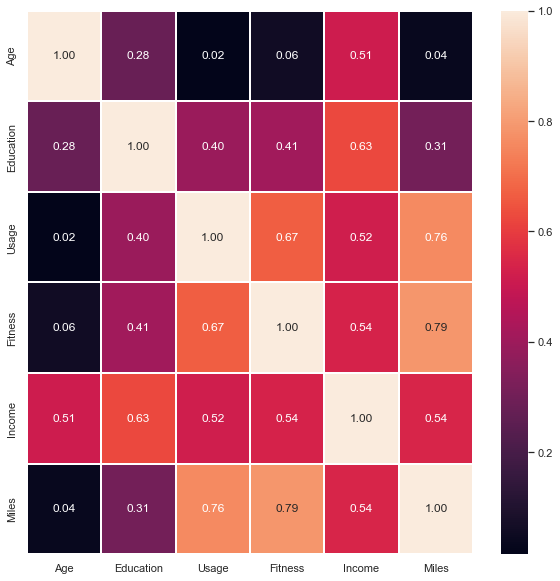

In [86]:
fig, ax = plt.subplots(figsize = (10,10))
sns.set(color_codes = True)
sns.heatmap(df.corr(), ax=ax, annot = True, linewidths = 0.05, fmt ='0.2f')
plt.show()



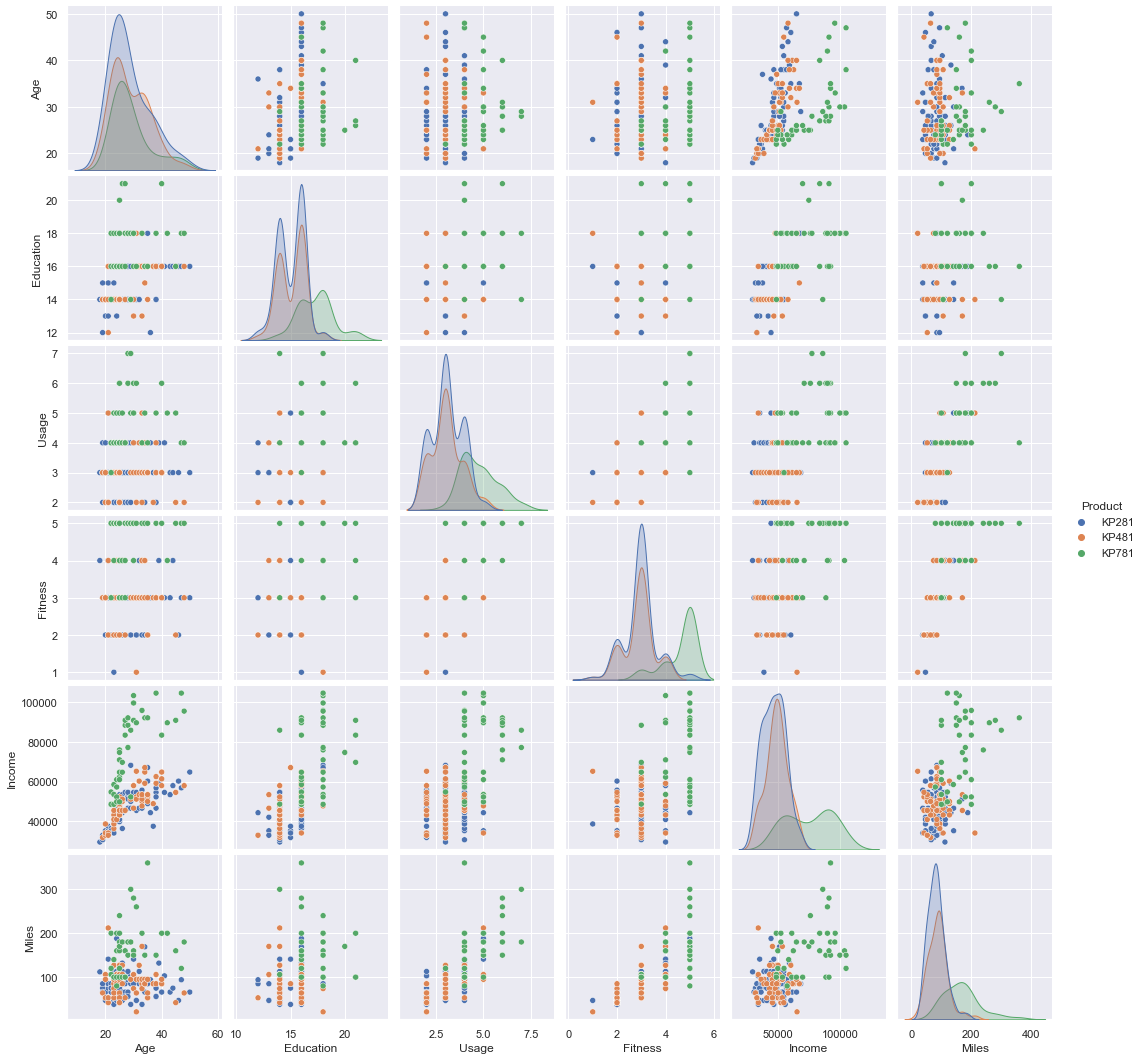

In [87]:
sns.pairplot(df, hue = "Product")
plt.show()



Observation


1. Out of the three product KP781 is for the experinced user, there consumer are much healtier, richer and educated.

2. When looking at sales data amough the product, KP781 has comparitively less sales then other two products. A promotion or a marketing campaign to attract the consumer for that categoty. 

In [88]:
df.shape

(180, 9)

In [89]:
df2 = df

What percent of customers have purchased KP281, KP481, or KP781?



In [90]:
df1 = df[['Product', 'Gender', 'MaritalStatus']].melt()


In [91]:
(df1.groupby(['variable', 'value'])[['value']].count() / len(df)).mul(100).round(2).astype(str) + '%'


value
variable      value            
Gender        Female     42.22%
              Male       57.78%
MaritalStatus Partnered  59.44%
              Single     40.56%
Product       KP281      44.44%
              KP481      33.33%
              KP781      22.22%

Obervations

Product

- 44.44% of the customers have purchased KP281 product.
- 33.33% of the customers have purchased KP481 product.
- 22.22% of the customers have purchased KP781 product.


Gender

- 57.78% of the customers are Male.

MaritalStatus

- 59.44% of the customers are Partnered.

Product - Gender

In [92]:
product_gender = pd.crosstab(index = df2['Product'], columns= [df2['Gender']], margins = True)

In [93]:
product_gender

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [94]:
pro_gen_781 = round((product_gender['Female']['KP781'] / product_gender['All']['All']),2)
pro_gen_781 = round(pro_gen_781 * 100 , 2)

In [95]:
pro_gen_781

4.0

In [96]:
pro_gen_mal = round((product_gender['Male']['All'] / product_gender['All']['All']),2)
pro_gen_mal = round(pro_gen_mal * 100,2)
pro_gen_mal

58.0

Product - Age

In [97]:
df3 = df.copy()

In [98]:
bins = [14,20,30,40,60]
labels = ['Teens','20s','30s','Above 40s']

df3['Age group'] = pd.cut(df3['Age'], bins)
df3['Age Category'] = pd.cut(df3['Age'], bins , labels = labels)

In [99]:
df3.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age group,Age Category
0,KP281,18,Male,14,Single,3,4,29562,112,"(14, 20]",Teens
1,KP281,19,Male,15,Single,2,3,31836,75,"(14, 20]",Teens
2,KP281,19,Female,14,Partnered,4,3,30699,66,"(14, 20]",Teens
3,KP281,19,Male,12,Single,3,3,32973,85,"(14, 20]",Teens
4,KP281,20,Male,13,Partnered,4,2,35247,47,"(14, 20]",Teens


In [100]:
product_age = pd.crosstab(index=df3['Product'], columns=[df3['Age Category']],margins=True)
product_age


Age Category,Teens,20s,30s,Above 40s,All
Product,,,,,
KP281,6,49,19,6,80
KP481,4,31,23,2,60
KP781,0,30,6,4,40
All,10,110,48,12,180


In [101]:
# Percentage of customers with Age between 20s and 30s among all customers
prob = round((product_age['20s']['All'] / product_age['All']['All']),2)
pct = round(prob*100,2)
pct

61.0

In [102]:
df4 = df.copy()

In [103]:
bins_income = [29000, 35000, 60000, 85000, 105000]
labels_income = ['Low Income','Lower-middle Income','Upper-Middle Income', 'High Income']
df4['IncomeCategory'] = pd.cut(df4['Income'],bins_income,labels = labels_income)


In [104]:
prd_inc = pd.crosstab(index = df4['Product'], columns = [df4['IncomeCategory']], margins = True)

In [105]:
# Percentage of customer with high-income salary buying treadmill given that Product is KP781
prob = round(prd_inc['High Income']['KP781'] / prd_inc['All']['KP781'],2)
pct = round(prob*100,2)
pct


42.0

Detecting an Outlier


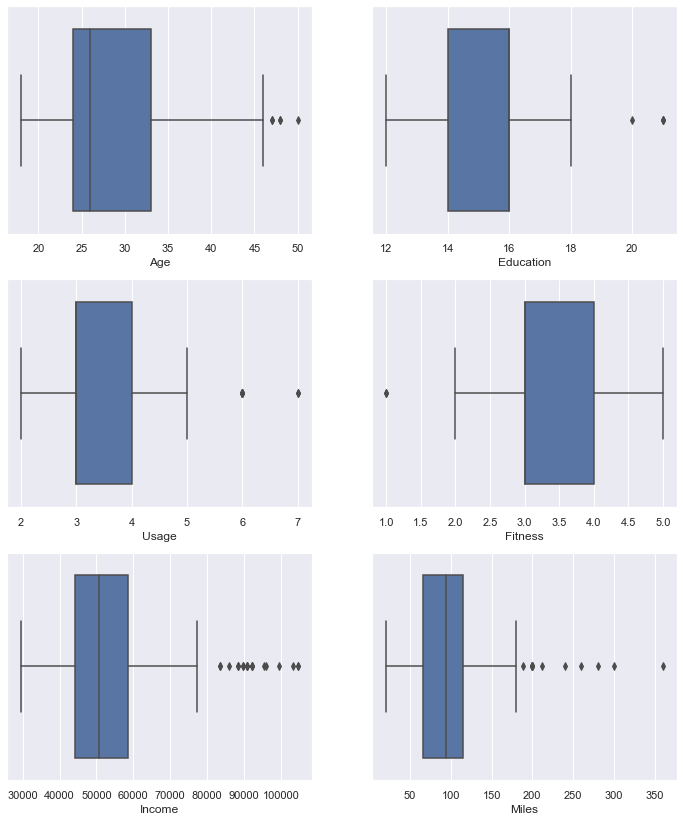

In [106]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=df, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=df, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=df, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=df, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=df, x="Miles", orient='h', ax=axis[2,1])
plt.show()

In [107]:
df5 = df.copy()


In [108]:
df5

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


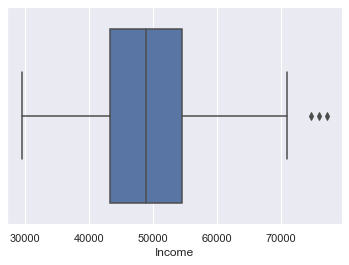

In [109]:
Q3 = df5['Income'].quantile(0.75)
Q1 = df5['Income'].quantile(0.25)
IQR = Q3-Q1
df_5 = df5[(df5['Income'] > Q1 - 1.5*IQR) & (df5['Income'] < Q3 + 1.5*IQR)]

sns.boxplot(data=df_5, x="Income", orient='h')
plt.show()


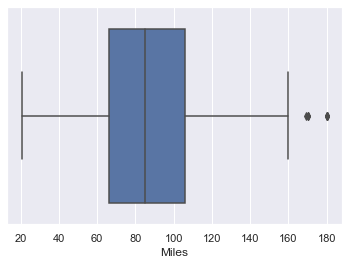

In [110]:
Q3 = df5['Miles'].quantile(0.75)
Q1 = df5['Miles'].quantile(0.25)
IQR = Q3-Q1
df_5 = df5[(df5['Miles'] > Q1 - 1.5*IQR) & (df5['Miles'] < Q3 + 1.5*IQR)]

sns.boxplot(data=df_5, x="Miles", orient='h')
plt.show()


In [111]:
df.shape

(180, 9)

In [112]:
df_5.shape

(167, 9)

Actionable Insights:



- Model KP281 is the best-selling product. 44.0% of all treadmill sales go to model KP281.

- The majority of treadmill customers fall within the $ 45,000 - $ 80,000 income bracket.

- 83% of treadmills are bought by individuals with incomes between $ 35,000 and $ 85,000

- There are only 8% of customers with incomes below $ 35000 who buy treadmills.
    
- 88% of treadmills are purchased by customers aged 20 to 40.


- Miles and Fitness & Miles and Usage are highly correlated, which means if a customer's fitness level is high they use more treadmills.





- KP781 is the only model purchased by a customer who has more than 20 years of education and an income of over $ 85,000.





- With Fitness level 4 and 5, the customers tend to use high-end treadmills and the average number of miles is above 150 per week
